In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('ramen-ratings.csv')
df.head()


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
df.shape


(2580, 7)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
df.drop(['Top Ten'], axis=1, inplace=True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.1+ KB


In [7]:
df.isna().sum()

Review #    0
Brand       0
Variety     0
Style       2
Country     0
Stars       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

In [10]:
df = df[['Brand', 'Variety', 'Country', 'Style', 'Stars']]
df.head()

,Brand,Variety,Country,Style,Stars
0,New Touch,T's Restaurant Tantanmen,Japan,Cup,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Taiwan,Pack,1
2,Nissin,Cup Noodles Chicken Vegetable,USA,Cup,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Taiwan,Pack,2.75
4,Ching's Secret,Singapore Curry,India,Pack,3.75


In [11]:
from sklearn.preprocessing import LabelEncoder # for encoding categorical data

enc = LabelEncoder()

df['Brand'] = enc.fit_transform(df['Brand'].values)
df['Variety'] = enc.fit_transform(df['Variety'].values)
df['Style'] = enc.fit_transform(df['Style'].astype(str))
df['Country'] = enc.fit_transform(df['Country'].values)
df['Stars'] = enc.fit_transform(df['Stars'].values)
df.head()


,Brand,Variety,Country,Style,Stars
0,190,2187,18,4,36
1,119,1441,32,5,6
2,192,453,35,4,15
3,336,707,32,5,18
4,38,1952,16,5,36


In [12]:
from sklearn.preprocessing import MinMaxScaler # for scaling data
scaler = MinMaxScaler()

scaler.fit(df[['Brand']])
df['Brand'] = scaler.transform(df[['Brand']])
scaler.fit(df[['Variety']])
df['Variety'] = scaler.transform(df[['Variety']])
scaler.fit(df[['Country']])
df['Country'] = scaler.transform(df[['Country']])
scaler.fit(df[['Style']])
df['Style'] = scaler.transform(df[['Style']])
scaler.fit(df[['Stars']])
df['Stars'] = scaler.transform(df[['Stars']])
df.head()


,Brand,Variety,Country,Style,Stars
0,0.536723,0.907469,0.486486,0.666667,0.72
1,0.336158,0.597925,0.864865,0.833333,0.12
2,0.542373,0.187967,0.945946,0.666667,0.30
3,0.949153,0.293361,0.864865,0.833333,0.36
4,0.107345,0.809959,0.432432,0.833333,0.72


In [13]:
data = df.iloc[:, [1,3]].values



Text(0.5, 0, 'Number of clusters')

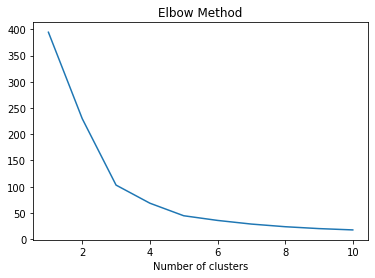

In [14]:
results = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  labels = kmeans.fit(data)
  results.append(kmeans.inertia_)
plt.plot(range(1, 11), results)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')



In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

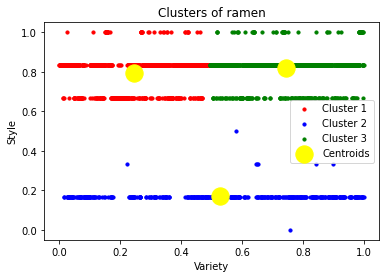

In [16]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of ramen')
plt.xlabel('Variety')
plt.ylabel('Style')
plt.legend()
plt.show()